In [3]:
%load_ext autoreload
%autoreload 2
from pathlib import Path
from ecglib.data import load_ptb_xl
from ecglib.data import EcgDataset
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import time

In [27]:
import warnings
import neurokit2 as nk
from neurokit2 import NeuroKitWarning  
from pathlib import Path

warnings.filterwarnings("ignore") 

In [28]:
from paths import data_dir

In [29]:
from cycles_signal_process import (
    prepare_wave_data,
    group_pqrst_points,
    calculate_amplitudes,
    calculate_intervals,
    calculate_amplitude_differences,
    calculate_all_wave_areas,
    calculate_area_ratios,

    calc_average_signal,
    calculate_statistics,
)
from features_extraction import (
    calc_signal_morphology_features,
)

from features_analysis import (
    plot_features_vs_age,
    calculate_age_correlations
)

In [30]:
from features_process import (
    get_ecg_signals_features,
)

In [31]:
from subject_process import (
    extract_subjects_info
)

In [32]:
data_dir, data_dir.exists()

(Path('C:/Users/lenovo/Desktop/sci/data/ecg'), True)

In [33]:
path_to_zip=data_dir / 'ptb_xl'
frequency = 500

channel_names = ['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']
fs = 500

# Download PTB-XL data

In [34]:
#ptb_xl_info = load_ptb_xl(download=True, path_to_zip=path_to_zip, path_to_unzip=path_to_zip)

# Loading PTB-XL data

In [35]:
ptb_xl_info = pd.read_csv(path_to_zip / "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2" / "ptbxl_database.csv")

In [36]:
ptb_xl_info["fpath"] = [
    str(path_to_zip / "ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2" / filename)
    for filename in ptb_xl_info["filename_hr"]
]
ptb_xl_info['frequency'] = frequency

In [37]:
ptb_xl_info

,ecg_id,patient_id,age,sex,height,weight,nurse,site,device,recording_date,...,ST-ELEV-MI,ST-DEPR-MI,Q-ISC,Q-ISC-QPeak,Q-ISC-V2V3,Q-ISC-RPeak,STRAIN,MI-ALL,fpath,frequency
0,1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00001_hr,500
1,2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00002_hr,500
2,3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00003_hr,500
3,4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00004_hr,500
4,5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\00000\00005_hr,500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21796,21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,...,False,True,False,False,False,False,False,True,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21833_hr,500
21797,21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21834_hr,500
21798,21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21835_hr,500
21799,21836,8873.0,64.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-09 18:21:49,...,False,False,False,False,False,False,False,False,C:\Users\lenovo\Desktop\sci\data\ecg\ptb_xl\ptb-xl-a-large-publicly-available-electrocardiography-dataset-1.0.2\records500\21000\21836_hr,500


In [38]:
targets = [
    [0.0] if 'AFIB' in eval(ptb_xl_info.iloc[i]['scp_codes']).keys() else [1.0] 
           for i in range(ptb_xl_info.shape[0])
]

In [39]:
ecg_data = EcgDataset(ecg_data=ptb_xl_info, target=targets, frequency=frequency, leads=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [40]:
ecg_data[50][1][0][0].shape

torch.Size([12, 5000])

# Getting features

In [41]:
import pandas as pd
import neurokit2 as nk
import numpy as np
from pathlib import Path
from tqdm import tqdm

processed_dir = Path('ptb_xl_npz')
fs = 500

In [42]:

"""
def plot_ecg_cycle_with_features(cycle, signal, fs, cycle_num=0):
    fig, ax = plt.subplots(figsize=(15, 8))
    
    # 1. Автоматическое определение границ цикла --------------------------------------
    available_points = []
    for point in ['ECG_P_Onsets', 'ECG_Q_Peaks', 'ECG_R_Peaks', 'ECG_S_Peaks', 'ECG_T_Offsets']:
        if point in cycle and len(cycle[point]) > 0:
            available_points.append(int(cycle[point][0]))
    
    if not available_points:
        print(f"Цикл {cycle_num}: нет точек для отрисовки")
        return fig
    
    # Границы цикла (с запасом 10% по краям)
    start = max(0, min(available_points) - int(0.1*fs))
    end = min(len(signal), max(available_points) + int(0.1*fs))
    
    # 2. Отрисовка сигнала ----------------------------------------------------------
    time = np.arange(start, end) / fs
    ax.plot(time, signal[start:end], 'b-', linewidth=1.5, label='ЭКГ сигнал')
    
    # 3. Разметка точек (только существующие) ---------------------------------------
    point_style = {
        'ECG_P_Onsets': ('<', 'green', 'P начало'),
        'ECG_P_Peaks': ('o', 'lime', 'P пик'),
        'ECG_P_Offsets': ('>', 'darkgreen', 'P конец'),
        'ECG_Q_Peaks': ('x', 'red', 'Q'),
        'ECG_R_Peaks': ('o', 'black', 'R'),
        'ECG_S_Peaks': ('x', 'blue', 'S'),
        'ECG_T_Onsets': ('<', 'purple', 'T начало'),
        'ECG_T_Peaks': ('o', 'magenta', 'T пик'),
        'ECG_T_Offsets': ('>', 'darkviolet', 'T конец')
    }
    
    for point, (marker, color, label) in point_style.items():
        if point in cycle and len(cycle[point]) > 0:
            x = cycle[point][0] / fs
            y = signal[int(cycle[point][0])]
            ax.plot(x, y, marker=marker, color=color, markersize=10, label=label)
    
    # 4. Отрисовка интервалов (только для существующих пар) -------------------------
    def draw_interval_if_exists(start_point, end_point, y_pos, label):
        if (start_point in cycle and len(cycle[start_point]) > 0 and 
            end_point in cycle and len(cycle[end_point]) > 0):
            x1 = cycle[start_point][0] / fs
            x2 = cycle[end_point][0] / fs
            ax.add_patch(Rectangle((x1, y_pos), x2-x1, 0.1, alpha=0.3, color='gray'))
            ax.text((x1+x2)/2, y_pos+0.15, f'{label}\n{(x2-x1)*1000:.1f} мс', 
                    ha='center', va='bottom', fontsize=9, bbox=dict(facecolor='white', alpha=0.7))
    
    y_min = np.min(signal[start:end])
    draw_interval_if_exists('ECG_P_Onsets', 'ECG_P_Offsets', y_min-0.3, 'P')
    draw_interval_if_exists('ECG_Q_Peaks', 'ECG_S_Peaks', y_min-0.5, 'QRS')
    draw_interval_if_exists('ECG_Q_Peaks', 'ECG_T_Offsets', y_min-0.7, 'QT')
    
    # 5. Настройка графика ----------------------------------------------------------
    ax.set_xlabel('Время (с)', fontsize=12)
    ax.set_ylabel('Амплитуда (мВ)', fontsize=12)
    ax.set_title(f'Цикл {cycle_num}', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Убираем дубликаты в легенде
    handles, labels = ax.get_legend_handles_labels()
    unique_labels = dict(zip(labels, handles))
    ax.legend(unique_labels.values(), unique_labels.keys(), loc='upper right')
    
    plt.tight_layout()
    return fig

def plot_averaged_signal(avg_signal, before_r, after_r, fs):
    if avg_signal is None:
        print("Невозможно построить график: недостаточно данных")
        return
    
    fig, ax = plt.subplots(figsize=(14, 7))
    
    # 1. Временная ось (в мс относительно R-пика)
    time = (np.arange(len(avg_signal)) - before_r) / fs * 1000  # мс
    
    # 2. Отрисовка сигнала
    ax.plot(time, avg_signal, 'b-', linewidth=2, label='Усредненный ЭКГ')
    
    # 3. Разметка ключевых элементов
    ax.axvline(x=0, color='r', linestyle='--', label='R-пик (0 мс)')
    ax.axvline(x=-before_r, color='gray', linestyle=':', label=f'Начало окна (-{before_r/fs*1000:.0f} мс)')
    ax.axvline(x=after_r, color='gray', linestyle=':', label=f'Конец окна (+{after_r/fs*1000:.0f} мс)')
    
    # 4. Настройка графика
    ax.set_xlabel('Время относительно R-пика (мс)', fontsize=12)
    ax.set_ylabel('Амплитуда (мВ)', fontsize=12)
    ax.set_title(f'Усредненный PQRST комплекс (окно ±{before_r/fs*1000:.0f}/{after_r/fs*1000:.0f} мс)', fontsize=14)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper right')
    
    plt.tight_layout()
    plt.show()

def plot_averaged_ecg(signal, cycles, fs):
    # 1. Подготовка данных для усреднения
    r_peaks = [int(cycle['ECG_R_Peaks'][0]) for cycle in cycles if 'ECG_R_Peaks' in cycle]
    if len(r_peaks) < 2:
        print("Недостаточно циклов для усреднения")
        return
    
    before_r = int(0.2 * fs)  # 200 мс до R
    after_r = int(0.5 * fs)   # 500 мс после R
    segments = []
    
    for r in r_peaks:
        start = max(0, r - before_r)
        end = min(len(signal), r + after_r)
        segment = signal[start:end]
        
        # Выравнивание по длине (если циклы у границ сигнала)
        if len(segment) < (before_r + after_r):
            pad_width = (before_r + after_r) - len(segment)
            segment = np.pad(segment, (0, pad_width), mode='constant')
        
        segments.append(segment)
    
    # 3. Усреднение и построение
    avg_signal = np.mean(segments, axis=0)
    time = (np.arange(len(avg_signal)) / fs) - 0.2  # Время относительно R-пика
    
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(time, avg_signal, 'b-', linewidth=2, label='Усредненный сигнал')
    
    # 4. Разметка характерных точек (медианные положения)
    point_labels = {
        'ECG_P_Peaks': ('P', 'green'),
        'ECG_Q_Peaks': ('Q', 'red'),
        'ECG_S_Peaks': ('S', 'blue'),
        'ECG_T_Peaks': ('T', 'purple')
    }
    
    for point_key, (label, color) in point_labels.items():
        points = []
        for cycle in cycles:
            if point_key in cycle and len(cycle[point_key]) > 0:
                points.append(cycle[point_key][0])
        
        if len(points) > 0:
            median_pos = np.median(points) - r_peaks[0]  # Относительно первого R-пика
            median_time = median_pos / fs
            y_val = np.interp(median_pos, np.arange(len(avg_signal)), avg_signal)
            ax.plot(median_time, y_val, 'o', color=color, markersize=8, label=label)
    
    # 5. Настройка графика
    ax.axvline(x=0, color='black', linestyle='--', label='R-пик')
    ax.set_xlabel('Время относительно R-пика (с)')
    ax.set_ylabel('Амплитуда (мВ)')
    ax.set_title(f'Усредненный PQRST комплекс (n={len(cycles)} циклов)')
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend()
    
    plt.tight_layout()
    plt.show()
"""

'\ndef plot_ecg_cycle_with_features(cycle, signal, fs, cycle_num=0):\n    fig, ax = plt.subplots(figsize=(15, 8))\n\n    # 1. Автоматическое определение границ цикла --------------------------------------\n    available_points = []\n    for point in [\'ECG_P_Onsets\', \'ECG_Q_Peaks\', \'ECG_R_Peaks\', \'ECG_S_Peaks\', \'ECG_T_Offsets\']:\n        if point in cycle and len(cycle[point]) > 0:\n            available_points.append(int(cycle[point][0]))\n\n    if not available_points:\n        print(f"Цикл {cycle_num}: нет точек для отрисовки")\n        return fig\n\n    # Границы цикла (с запасом 10% по краям)\n    start = max(0, min(available_points) - int(0.1*fs))\n    end = min(len(signal), max(available_points) + int(0.1*fs))\n\n    # 2. Отрисовка сигнала ----------------------------------------------------------\n    time = np.arange(start, end) / fs\n    ax.plot(time, signal[start:end], \'b-\', linewidth=1.5, label=\'ЭКГ сигнал\')\n\n    # 3. Разметка точек (только существующие) ----

In [ ]:
get_ecg_signals_features(
    processed_dir=path_to_zip/'ptb_xl_npz', 
    output_dir_features='ptb_xl_features_signal_morphology', method="dwt", 
    avg_signal=False, show_plot=False, calc_waves_peak=False,
    fs=fs, extractors=['morphology']
)

Found 18868 patient files


Processing patients:   0%|          | 0/18868 [00:00<?, ?it/s]

features shape: (10403,) Index(['patient_id', 'target', 'ECG_P_Onsets_amplitude_median_I',
       'ECG_P_Onsets_amplitude_mean_I', 'ECG_P_Onsets_amplitude_std_I',
       'ECG_P_Onsets_amplitude_q25_I', 'ECG_P_Onsets_amplitude_q75_I',
       'ECG_P_Onsets_amplitude_min_I', 'ECG_P_Onsets_amplitude_max_I',
       'ECG_P_Peaks_amplitude_median_I',
       ...
       'T_P_ratio_q75_V6', 'T_P_ratio_min_V6', 'T_P_ratio_max_V6',
       'Q_R_R_S_ratio_median_V6', 'Q_R_R_S_ratio_mean_V6',
       'Q_R_R_S_ratio_std_V6', 'Q_R_R_S_ratio_q25_V6', 'Q_R_R_S_ratio_q75_V6',
       'Q_R_R_S_ratio_min_V6', 'Q_R_R_S_ratio_max_V6'],
      dtype='object', length=10403)


Processing patients:   0%|          | 0/18868 [00:01<?, ?it/s]


Saved final batch patient_features_18001_to_18868.parquet


# Reading features

In [34]:
ptb_xl_features = pd.read_parquet(path_to_zip / 'ptb_xl_features_signal_morphology')

In [ ]:
#ptb_xl_features = pd.read_parquet(path_to_zip / 'ptb_xl_features')

In [35]:
low_ptb_xl_features = ptb_xl_features.dropna(axis=1, how='all')#.iloc[:200]

In [37]:
low_ptb_xl_features.dropna(axis=1, how='all')

,patient_id,target,file_name,age,sex,ECG_P_Onsets_amplitude_median_I,ECG_P_Onsets_amplitude_mean_I,ECG_P_Onsets_amplitude_std_I,ECG_P_Onsets_amplitude_q25_I,ECG_P_Onsets_amplitude_q75_I,...,T_area_corrected_q75_V6,T_area_corrected_min_V6,T_area_corrected_max_V6,T_QRS_ratio_median_V6,T_QRS_ratio_mean_V6,T_QRS_ratio_std_V6,T_QRS_ratio_q25_V6,T_QRS_ratio_q75_V6,T_QRS_ratio_min_V6,T_QRS_ratio_max_V6
0,20449,0.0,ecg_20449.npz,300,1,-0.376177,-0.388651,0.158087,-0.479782,-0.303636,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2045,1.0,ecg_2045.npz,70,1,-0.274322,-0.317769,0.202480,-0.372930,-0.178484,...,0.139542,0.090375,0.150349,0.825354,0.995727,0.265568,0.798648,1.156839,0.754280,1.443513
2,20450,1.0,ecg_20450.npz,52,0,-0.252849,-0.361511,0.203665,-0.468281,-0.232139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
4,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,20443,1.0,ecg_20443.npz,50,1,-0.248135,-0.224311,0.157821,-0.376982,-0.085447,...,0.066007,0.043937,0.084954,0.485576,0.494633,0.086981,0.446233,0.542887,0.359024,0.633858
18864,20444,1.0,ecg_20444.npz,69,1,-0.117161,-0.121254,0.177196,-0.197125,0.041040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18865,20445,1.0,ecg_20445.npz,67,0,-0.047576,0.003549,0.203032,-0.109423,0.171465,...,0.009414,0.009414,0.009414,0.121215,0.121215,0.000000,0.121215,0.121215,0.121215,0.121215
18866,20446,1.0,ecg_20446.npz,50,1,-0.107781,-0.065668,0.214361,-0.156220,-0.017808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
low_ptb_xl_features.isna().sum()

patient_id               0
target                   0
file_name                0
age                      0
sex                      0
                      ... 
T_QRS_ratio_std_V6    4888
T_QRS_ratio_q25_V6    4888
T_QRS_ratio_q75_V6    4888
T_QRS_ratio_min_V6    4888
T_QRS_ratio_max_V6    4888
Length: 11765, dtype: int64

In [39]:
nan_counts = low_ptb_xl_features.isna().sum()
total_rows = len(low_ptb_xl_features)
nan_percentage = (nan_counts / total_rows) * 100

columns_to_keep = nan_percentage[nan_percentage <= 30].index
low_ptb_xl_features = low_ptb_xl_features[columns_to_keep]

In [40]:
cols_to_drop = [col for col in low_ptb_xl_features.columns if low_ptb_xl_features[col].nunique() == 1]
low_ptb_xl_features = low_ptb_xl_features.drop(columns=cols_to_drop)

In [41]:
columns_to_drop = [col for col in low_ptb_xl_features.columns 
                   if col.startswith(('TrappingTime', 'LEn_', 'L_', 'VEn_', 'RecurrenceRate'))]
low_ptb_xl_features = low_ptb_xl_features.drop(columns=columns_to_drop)

In [42]:
low_ptb_xl_features = low_ptb_xl_features[low_ptb_xl_features['age'] < 100]

In [43]:
low_ptb_xl_features

,patient_id,target,file_name,age,sex,ECG_P_Onsets_amplitude_median_I,ECG_P_Onsets_amplitude_mean_I,ECG_P_Onsets_amplitude_std_I,ECG_P_Onsets_amplitude_q25_I,ECG_P_Onsets_amplitude_q75_I,...,T_area_corrected_q75_V6,T_area_corrected_min_V6,T_area_corrected_max_V6,T_QRS_ratio_median_V6,T_QRS_ratio_mean_V6,T_QRS_ratio_std_V6,T_QRS_ratio_q25_V6,T_QRS_ratio_q75_V6,T_QRS_ratio_min_V6,T_QRS_ratio_max_V6
1,2045,1.0,ecg_2045.npz,70,1,-0.274322,-0.317769,0.202480,-0.372930,-0.178484,...,0.139542,0.090375,0.150349,0.825354,0.995727,0.265568,0.798648,1.156839,0.754280,1.443513
2,20450,1.0,ecg_20450.npz,52,0,-0.252849,-0.361511,0.203665,-0.468281,-0.232139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
4,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
5,20451,1.0,ecg_20451.npz,47,0,0.003318,0.005367,0.258168,-0.061164,0.089897,...,0.134529,0.106613,0.177308,1.200154,1.285011,0.209492,1.188469,1.422964,1.004295,1.609174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18863,20443,1.0,ecg_20443.npz,50,1,-0.248135,-0.224311,0.157821,-0.376982,-0.085447,...,0.066007,0.043937,0.084954,0.485576,0.494633,0.086981,0.446233,0.542887,0.359024,0.633858
18864,20444,1.0,ecg_20444.npz,69,1,-0.117161,-0.121254,0.177196,-0.197125,0.041040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18865,20445,1.0,ecg_20445.npz,67,0,-0.047576,0.003549,0.203032,-0.109423,0.171465,...,0.009414,0.009414,0.009414,0.121215,0.121215,0.000000,0.121215,0.121215,0.121215,0.121215
18866,20446,1.0,ecg_20446.npz,50,1,-0.107781,-0.065668,0.214361,-0.156220,-0.017808,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1]:
low_ptb_xl_features.isna().sum()

NameError: name 'low_ptb_xl_features' is not defined

In [46]:
qrs_columns = [col for col in low_ptb_xl_features.columns if 'QRS_' in col]

print(low_ptb_xl_features[qrs_columns].describe())

       QRS_area_median_I  QRS_area_mean_I  QRS_area_std_I  QRS_area_q25_I  \
count       17076.000000     17076.000000    17076.000000    17076.000000   
mean            0.094270         0.094192        0.016233        0.084912   
std             0.048142         0.047810        0.014804        0.049086   
min            -0.267480        -0.267480        0.000000       -0.281808   
25%             0.063868         0.063676        0.007531        0.053731   
50%             0.098152         0.098158        0.013861        0.089050   
75%             0.127002         0.126951        0.021425        0.118757   
max             0.342937         0.342937        0.227387        0.342937   

       QRS_area_q75_I  QRS_area_min_I  QRS_area_max_I  P_QRS_ratio_median_I  \
count    17076.000000    17076.000000    17076.000000          17076.000000   
mean         0.103607        0.071968        0.116142              0.223590   
std          0.048058        0.054519        0.050561              1.

In [47]:
import pandas as pd

# Предположим, что таблица уже загружена в low_ptb_xl_features
# Если нет, раскомментируйте следующую строку:
# low_ptb_xl_features = pd.read_csv('your_file.csv')  # или другой формат

# Находим колонки, содержащие "QRS_"
qrs_columns = [col for col in low_ptb_xl_features.columns if 'QRS_' in col]

if not qrs_columns:
    print("Колонки, содержащие 'QRS_', не найдены в таблице.")
else:
    # Выбираем только нужные колонки
    qrs_data = low_ptb_xl_features[qrs_columns]
    
    # Создаем DataFrame с описательной статистикой
    desc_stats = qrs_data.describe(include='all').transpose()
    
    # Добавляем информацию о пропущенных значениях
    desc_stats['nan_count'] = qrs_data.isna().sum()
    desc_stats['nan_percent'] = (desc_stats['nan_count'] / len(qrs_data)) * 100
    
    # Добавляем медиану (если ее нет в describe)
    if '50%' not in desc_stats.columns:
        desc_stats['median'] = qrs_data.median()
    
    # Форматируем вывод
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    pd.set_option('display.float_format', '{:.2f}'.format)
    
    print("Описательная статистика для колонок с QRS_ и информация о пропущенных значениях:")
    print(desc_stats[['count', 'nan_count', 'nan_percent', 'mean', 'std', 'min', '50%', 'max']])

Описательная статистика для колонок с QRS_ и информация о пропущенных значениях:
                      count  nan_count  nan_percent  mean   std      min  50%     max
QRS_area_median_I  17076.00       1545         8.30  0.09  0.05    -0.27 0.10    0.34
QRS_area_mean_I    17076.00       1545         8.30  0.09  0.05    -0.27 0.10    0.34
QRS_area_std_I     17076.00       1545         8.30  0.02  0.01     0.00 0.01    0.23
QRS_area_q25_I     17076.00       1545         8.30  0.08  0.05    -0.28 0.09    0.34
QRS_area_q75_I     17076.00       1545         8.30  0.10  0.05    -0.25 0.11    0.38
...                     ...        ...          ...   ...   ...      ...  ...     ...
T_QRS_ratio_std_V6 13826.00       4795        25.75  1.05 15.95     0.00 0.11 1144.28
T_QRS_ratio_q25_V6 13826.00       4795        25.75  0.54  6.22  -332.31 0.62  301.23
T_QRS_ratio_q75_V6 13826.00       4795        25.75  1.13  4.94  -165.97 0.77  301.23
T_QRS_ratio_min_V6 13826.00       4795        25.75 -0.85 4

In [51]:
correlations = calculate_age_correlations(
    df=low_ptb_xl_features,
    age_column='age',
    save_dir=path_to_zip / 'ptb_xl_features_signal_morphology_scatter_plots_v2',
    exclude_columns={'patient_id', 'target', 'original_length', 'file_name', 'age', 'sex'}
)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\lenovo\\Desktop\\sci\\data\\ecg\\ptb_xl_features_scatter_plots_v2\\sd1\\sd2_I_vs_age.png'

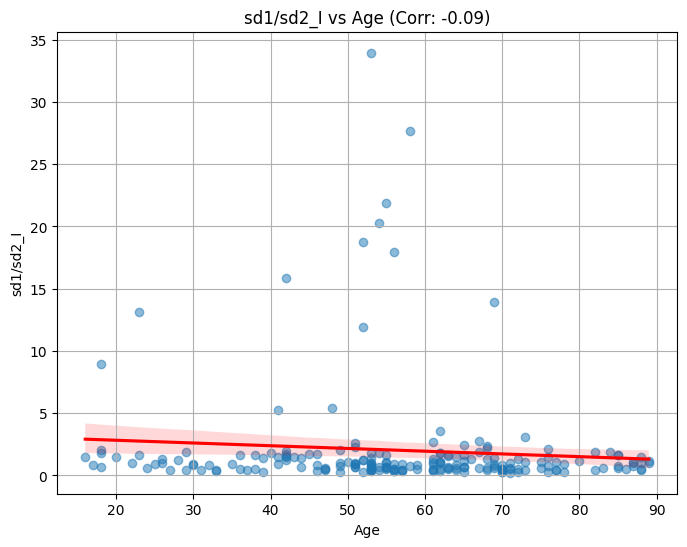

In [190]:
plot_features_vs_age(
    df=low_ptb_xl_features,
    age_column='age',
    save_dir= path_to_zip / 'ptb_xl_features_scatter_plots_v2',
    exclude_columns={'patient_id', 'target', 'original_length', 'file_name', 'age', 'sex'}
)